In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\survey_data (1).csv.crdownload")
print(data.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [7]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
data.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

In [9]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

In [11]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,2892


In [13]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


In [15]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,473
1,25-34 years old,955
2,35-44 years old,762
3,45-54 years old,368
4,55-64 years old,163
5,65 years or older,58
6,Prefer not to say,21
7,Under 18 years old,92


In [17]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


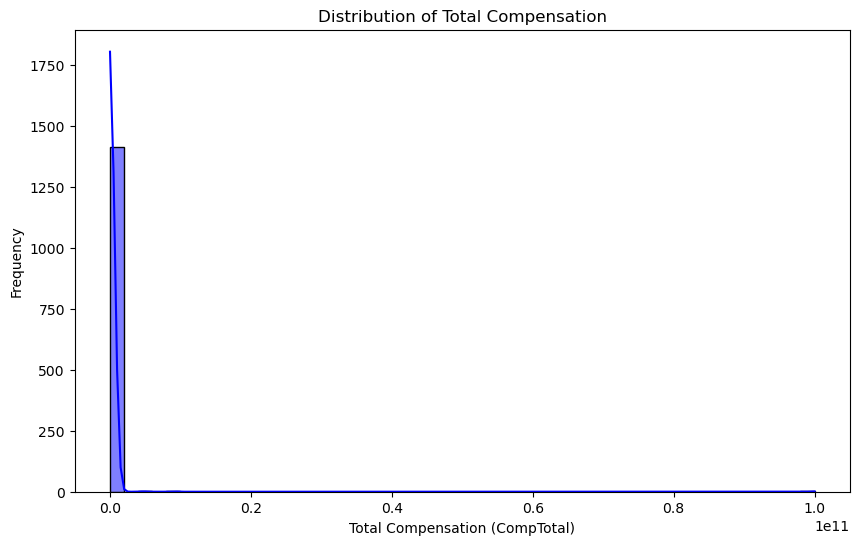

In [19]:
plt.figure(figsize=(10, 6))
# Plot histogram with kernel density estimation (KDE)
sns.histplot(data=data, x="CompTotal", bins=50, kde=True, color="blue")
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Compensation")
# Show plot
plt.show()

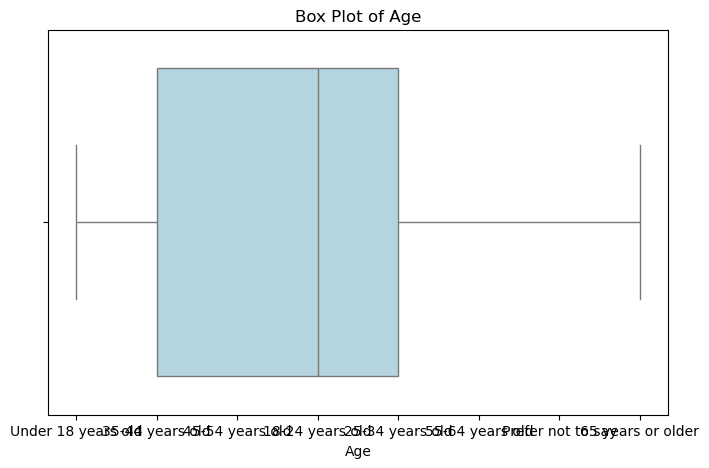

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["Age"], color="lightblue")
plt.title("Box Plot of Age")
plt.xlabel("Age")
plt.show()

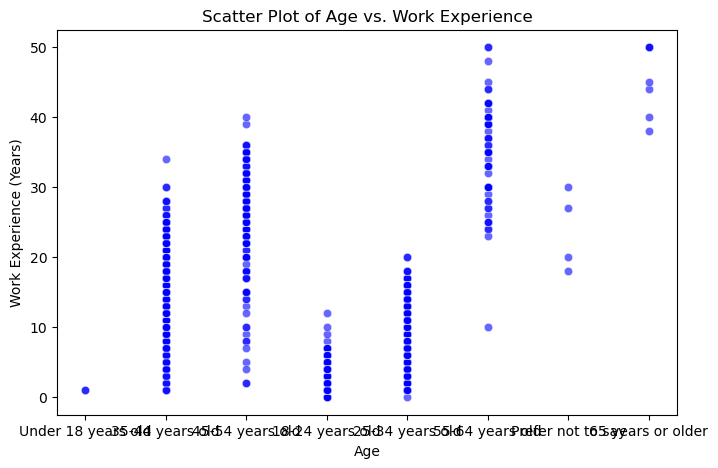

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Age"], y=data["WorkExp"], alpha=0.6, color="blue")
plt.title("Scatter Plot of Age vs. Work Experience")
plt.xlabel("Age")
plt.ylabel("Work Experience (Years)")
plt.show()

In [27]:
data["TimeSearching"] = pd.to_numeric(data["TimeSearching"], errors="coerce")
data["Frustration"] = pd.to_numeric(data["Frustration"], errors="coerce")
data["Age"] = pd.to_numeric(data["Age"], errors="coerce")

In [29]:
data = data.dropna(subset=["TimeSearching", "Frustration", "Age"])

In [31]:
data["Age"] = data["Age"].astype(float)

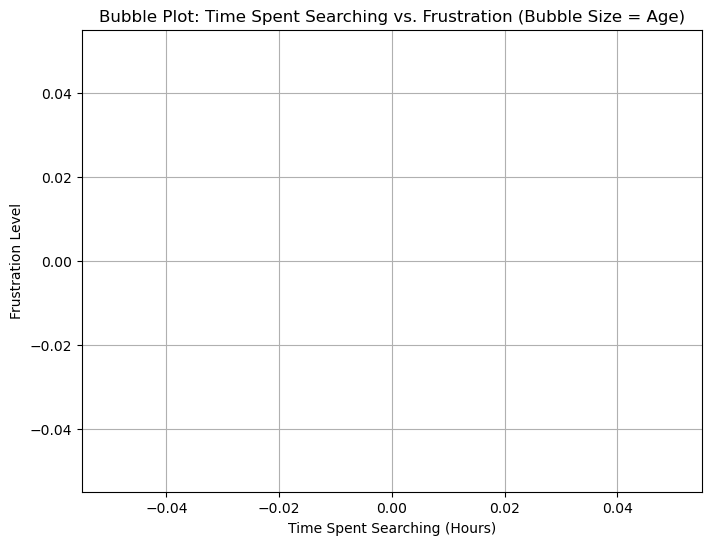

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(
    data["TimeSearching"], 
    data["Frustration"], 
    s=data["Age"] * 5,  
    alpha=0.5, 
    color="blue", 
    edgecolors="k"
)
plt.title("Bubble Plot: Time Spent Searching vs. Frustration (Bubble Size = Age)")
plt.xlabel("Time Spent Searching (Hours)")
plt.ylabel("Frustration Level")
plt.grid(True)
plt.show()

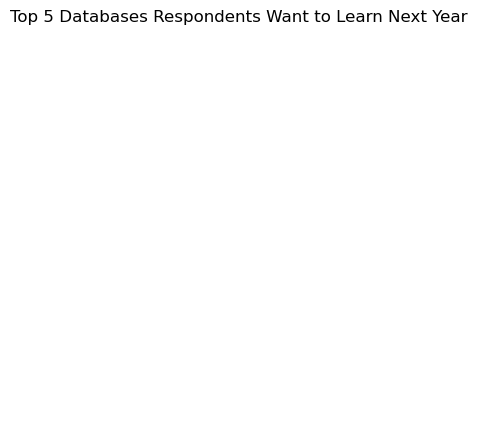

In [37]:
database_counts = data["DatabaseWantToWorkWith"].str.split(";").explode().value_counts()
# Select the top 5 databases
top_5_databases = database_counts.head(5)
# Create a pie chart
plt.figure(figsize=(5,58))
plt.pie(
    top_5_databases, 
    labels=top_5_databases.index, 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0"]
)
plt.title("Top 5 Databases Respondents Want to Learn Next Year")
plt.show()

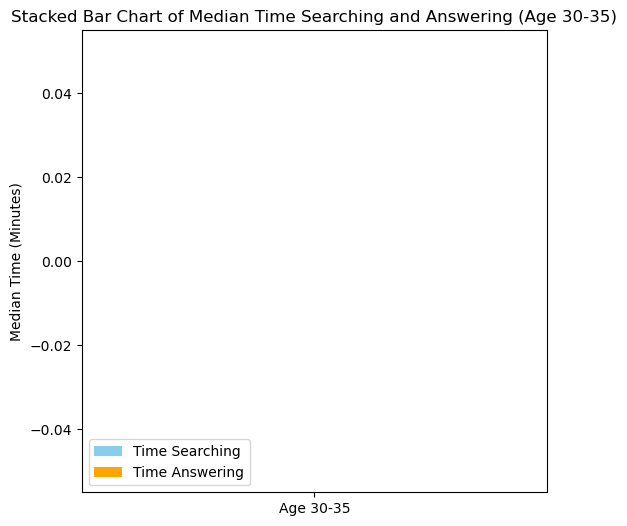

In [39]:
filtered_data = data[(data["Age"] >= 30) & (data["Age"] <= 35)]

# Calculate median values
median_times = {
    "Time Searching": filtered_data["TimeSearching"].median(),
    "Time Answering": filtered_data["TimeAnswering"].median(),
}

# Plot stacked bar chart
plt.figure(figsize=(6, 6))
plt.bar(["Age 30-35"], median_times["Time Searching"], label="Time Searching", color="skyblue")
plt.bar(["Age 30-35"], median_times["Time Answering"], label="Time Answering", color="orange", bottom=median_times["Time Searching"])

# Labels and title
plt.ylabel("Median Time (Minutes)")
plt.title("Stacked Bar Chart of Median Time Searching and Answering (Age 30-35)")
plt.legend()
plt.show()

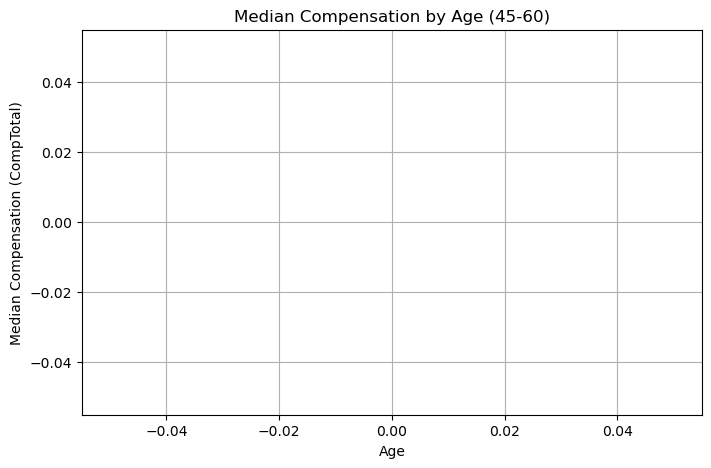

In [41]:
# Filter data for age group 45-60
filtered_data = data[(data["Age"] >= 45) & (data["Age"] <= 60)]

# Group by age and compute median compensation
median_comp_by_age = filtered_data.groupby("Age")["CompTotal"].median()

# Plot the line chart
plt.figure(figsize=(8, 5))
plt.plot(median_comp_by_age.index, median_comp_by_age.values, marker="o", linestyle="-", color="blue")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Median Compensation (CompTotal)")
plt.title("Median Compensation by Age (45-60)")
plt.grid(True)

plt.show()

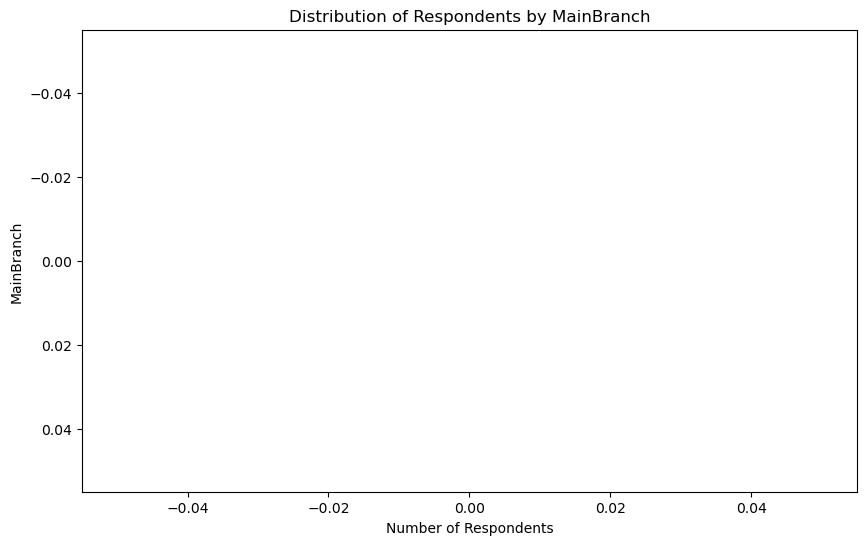

In [43]:
mainbranch_counts = data["MainBranch"].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(mainbranch_counts.index, mainbranch_counts.values, color="skyblue")

# Labels and title
plt.xlabel("Number of Respondents")
plt.ylabel("MainBranch")
plt.title("Distribution of Respondents by MainBranch")
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

plt.show()

In [45]:
conn.close()